# REDIS (NoSQL)

# 1. Stabilire connessione
Remember that __you should have already started the Redis container__. Look up how to do it in the course slides or in the main README page of this GitHub repository.
! pip install redis

Creiamo una variabile *r* che è il collegamento con il Database chiamato "my_redis". \
*r.ping()* restituisce True se la connessione è andata buon fine. \
Il parametro *decode_responses=True* serve per avere un output direttamente come stringa e non come byte
```python
! pip install redis
import redis
r = redis.Redis(host="my_redis", decode_responses=True) 
print(r.ping()) #Verify that the Redis database works
r.flushall()
```

# 2. Aggiungere i values alle keys 
Ogni key di Redis è associata a un value, che può essere di qualsiasi natura:
- String, integer
- List
- Set
- Sorted Set
- Hashes (dictionaries)

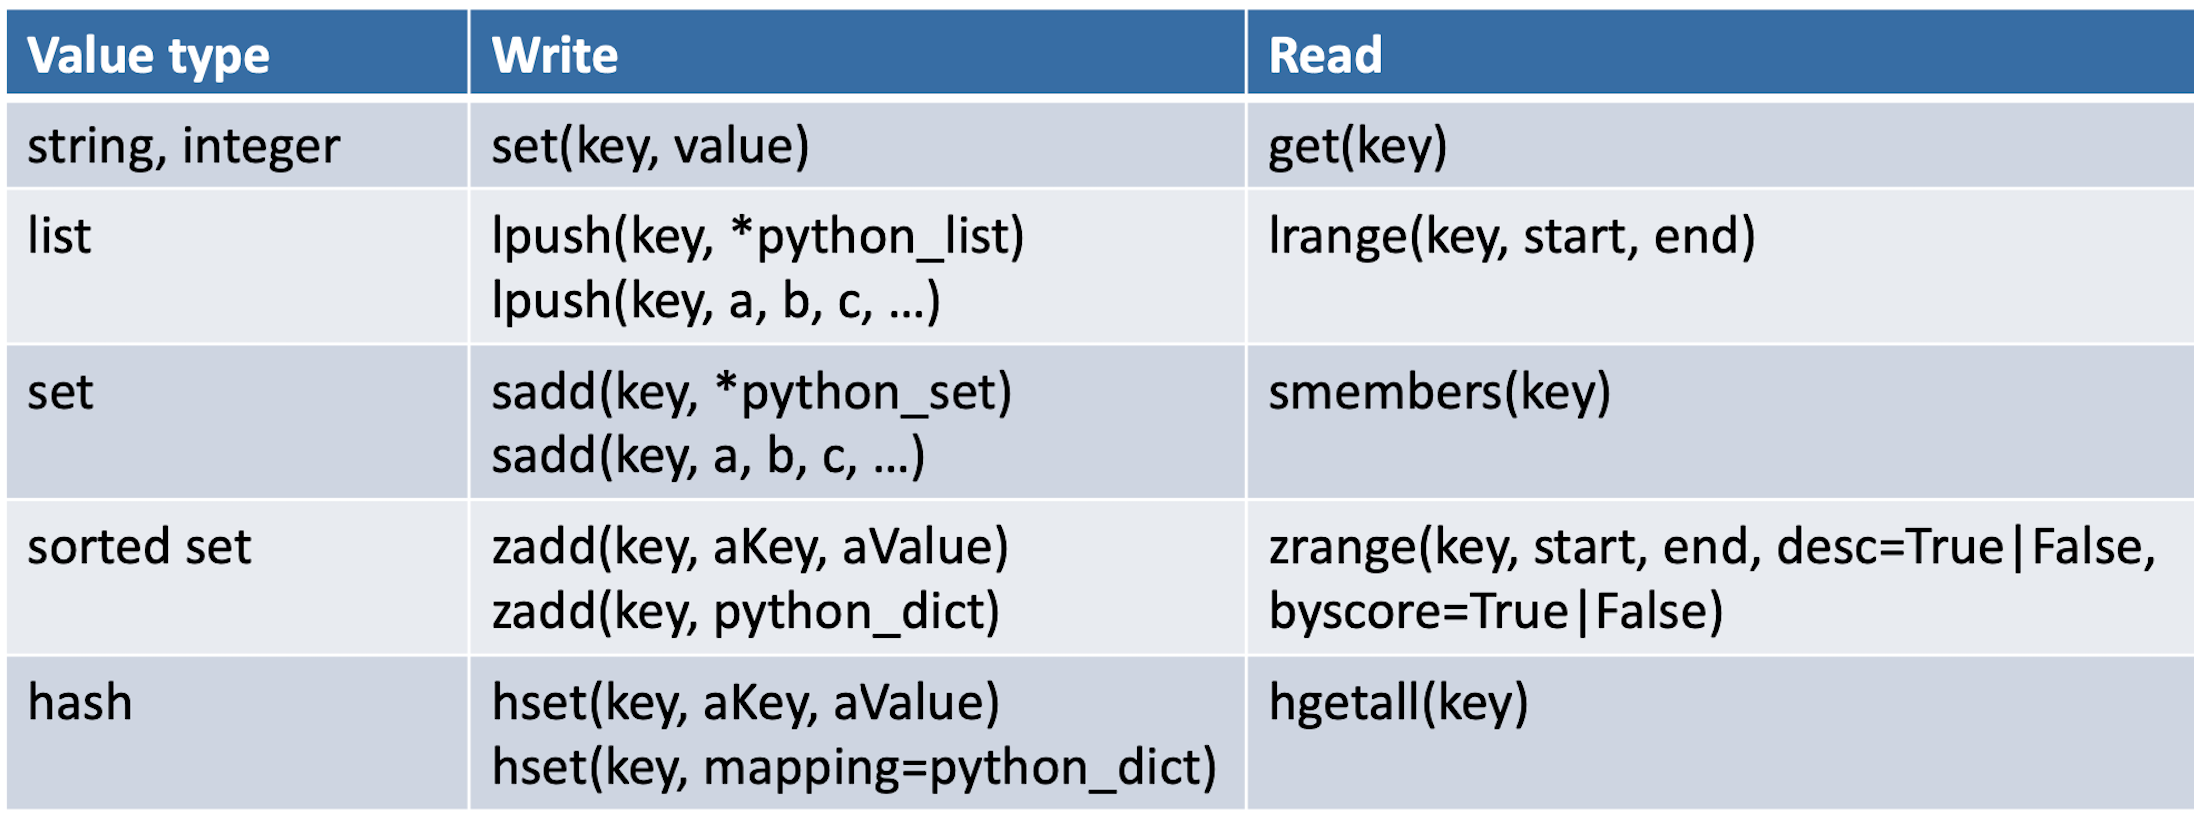  

## String/integer
```python
r.set('temperature', 18.5
      
r.get('temperature')
r.get('temperature').decode()
```
Per aumentare la velocità si può suare *pipe* che compatta il database: raggruppa i comandi e li spedisce ad eseguire
```python
pipe = r.pipeline() 
key = 'temperature'
value = 18.5
pipe.set(key, value)
pipe.execute()

```


## List
Si può passare come value una lista già creata, oppure esplicitando i singoli elementi come stringhe.\
I parametri **start** e **end** sono **obbligatori**: per mostrare tutti i valori di quella chiave --> start=0, end=-1

```python
males = ['Peter', 'Paul', 'John']

r.lpush('Male_names', *males)
r.lpush('Female_names', 'Sarah', 'Mary', 'Elizabeth')

r.lrange('Male_names', start=0, end=-1)
r.lrange('Female_names', start=0, end=2)
```

## Set
I set sono oggetti che contengono elementi **unici, non ordinati e mutabili**\
Si può passare come value un set già creato, oppure esplicitando i i sngoli elementi come stringghe.

```python
chapters = {'Chapter 1', 'Chapter 2'}

r.sadd('Chapters1:2', *chapters)
r.sadd('Chapters3:4', 'Chapter 3', 'Chapter 4')

r.smembers('Chapters1:2')
>>'Chapter 1'
>>'Chapter 2'


```

## Sorted sets
Un sorted set è un dizionario di chiavi e valori, dove i valori sono numeri utilizzati per ordinare il set. \
I parametri **start** e **end** sono **obbligatori**: per mostrare tutti i valori di quella chiave --> start=0, end=-1 \
- desc: esplicita l'ordine
- withscore: printa anche il valore associato alla chiave
- byscore: permette di inserire  uno score di range desiderato tramite i paraemtri start e end

```python
r.zadd('universities', {'MIT':100, 'Stanford':98.4, 'Harvard':97.9, 'Caltech':97, 'Oxford':96.7})

r.zrange('universities', start=0, end=-1) # Chiavi printate in ordine crescente 
r.zrange('universities', start=0, end=-1, desc=True) #Chiavi printate in ordine decrescente

r.zrange('universities', start=0, end=-1, withscores=True) #CHIAVI e VALORI in ordine crescente

r.zrange('universities', start=97, end=98, withscores=True, byscore=True)# CHIAVI e VALORI con un punteggio tra 97 e 98

## Hash (dictionary)
Un Hash è un normale dizionario pyhton
Il parametro **mapping=** è **obligatorio** prima di esplicitare il dizionario

```python
my_dict = {'buongiorno':'buenos dias', 'buonasera':'buenas noches'}
r.hset('Italian:Spanish', mapping=my_dict)

r.hgetall('Italian:Spanish')
>> 'buongiorno':'buenos dias
>> 'buonasera':'buenas noches'

# 3. Eliminare keys 
Il programma attende il numero di secondi contenuti nella parentesi prima di passare al comando successivo. \
Serve a bloccare il tempo all'interno della cella.

```python

import time

r.flushall() # delete ALL keys in the DB
TTL = 5
r.set('temperature', 18.5)
r.expire('temperature', TTL)  # the key will be deleted after TTL seconds

print("Temperature =", r.get('temperature'))
print("now sleeping for %s seconds..." % (TTL))

time.sleep(TTL) 

print("Temperature =", r.get('temperature'))
```


# 4. SQL --> REDIS 
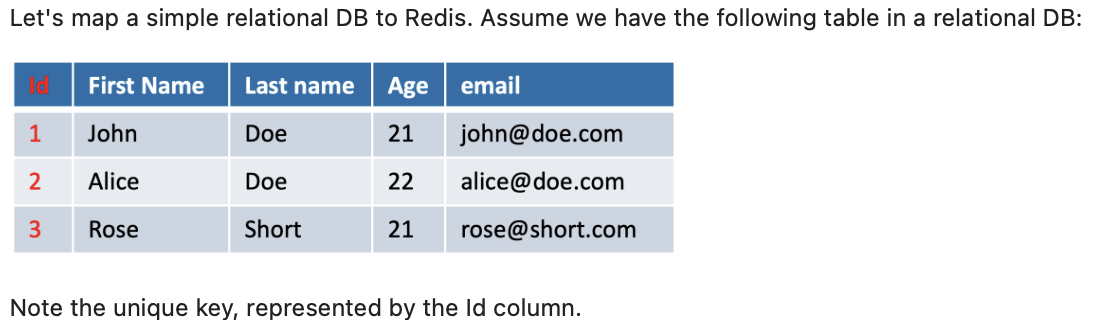
Creiamo vari redis *hashes*, ognuno corrispondente a una riga del RDBMS
"id:1" è la chiave di del "database r" 
Il value in questo caso è un hash (che è come un dizionario di python)

```python
r.hset('id:1', mapping={'first':'John', 'last':'Doe', 'age': 21, 'email':'john@doe.com'})
r.hset('id:2', mapping={'first':'Alice', 'last':'Doe', 'age': 22, 'email':'alice@doe.com'})
r.hset('id:3', mapping={'first':'Rose', 'last':'Short', 'age': 21, 'email':'rose@short.com'})

# the Redis equivalent to the SQL 'SELECT * FROM Students WHERE ID=1' would then be:
r.hgetall('id:1')


# create a sorted set with ages, mapping them to the corresponding hash key above
r.zadd('age', mapping={'id:1':21, 'id:2':22, 'id:3':21})
print("all elements:", r.zrange('age', start=0, end=-1, withscores=True))


# the Redis equivalent to the SQL 'SELECT * FROM Students WHERE Age < 22' would then be:
result = r.zrange('age', start=0, end=21, byscore=True)
print("age<21:", result)
```

